### Deep Learning Libraries

Theano - Opensource numerical computational library. Very efficient for fast numerical computation. It can run on CPU and GPU
GPU is a much better coice for deep neural network
Tensorflow - Opensource numerical library that runs very fast computation

Theano and Tensorflows are used for research and development purposes. You can build a deep neural network from scratch using these tecnologies

Keras wraps Theano and Tensorflow. You can build a deep learning model with a very few lines of code



# Importing the libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

# Importing the dataset

In [84]:
dataset = pd.read_csv('bank_customer_churn.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding the categorical data

In [85]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the dummy variable trap

In [86]:
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling..... A must for Artificial Neural Network

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Let's make an Artificial Neural Network

### Importing the key modules

In [89]:
# Sequential module is required to initialize the neural network
from keras.models import Sequential
# Dense module is required to build the layers of the ANN
from keras.layers import Dense

### Initiializing the ANN

In [90]:
# Model for ANN
classifier = Sequential()

### Add different layers step by step

### Adding the first input layer with 11 input variables

In [91]:
# Rectifier function is used for the input layer
# Units - Number of nodes in the hidden layer 
# It is typically average of number of nodes in input and output layers
# uniform - initialize weights uniformly. Small numbers closer to 0 
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

### 2nd hidden layer knows the number of input variables

In [92]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

### Adding the output layer

In [93]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

### Compile the Artificial Neural Network.. applying stochastic gradient descent on the ANN

In [94]:
# adam - the algorithm to use to find the optimal set of weights. 
# loss function is used to calculate the optimal weight
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

###    Making the prediction and evaluation the model

Fit the ANN to the training set

Choose the number of Epochs

In [102]:
# The magic happens here

In [95]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [96]:
y_pred

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [97]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [98]:
cm

array([[1308,  287],
       [ 334,   71]])

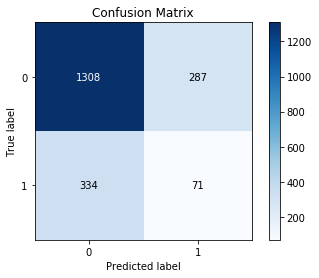

In [99]:
#plot the cofusion matrix
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

In [100]:
#print accuracy
print(accuracy_score(y_test,y_pred))

0.6895


In [101]:
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)
new_prediction

array([[False]])